# Clustering - Gaussian mixtre model
Reference: https://datachemeng.com/gaussianmixturemodel/

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.mixture import GaussianMixture        # GMM

%matplotlib inline

In [2]:
# Import dataset
df = pd.read_csv('auto-mpg_clean.csv')
df.head()

,car name,mpg,cylinders,displacement,horsepower,weight,acceleration
0,chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0
1,buick skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5
2,plymouth satellite,18.0,8.0,318.0,150.0,3436.0,11.0
3,amc rebel sst,16.0,8.0,304.0,150.0,3433.0,12.0
4,ford torino,17.0,8.0,302.0,140.0,3449.0,10.5


In [3]:
# Remove unnecessary columns
X = df.iloc[:, 1:]
X.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8.0,307.0,130.0,3504.0,12.0
1,15.0,8.0,350.0,165.0,3693.0,11.5
2,18.0,8.0,318.0,150.0,3436.0,11.0
3,16.0,8.0,304.0,150.0,3433.0,12.0
4,17.0,8.0,302.0,140.0,3449.0,10.5


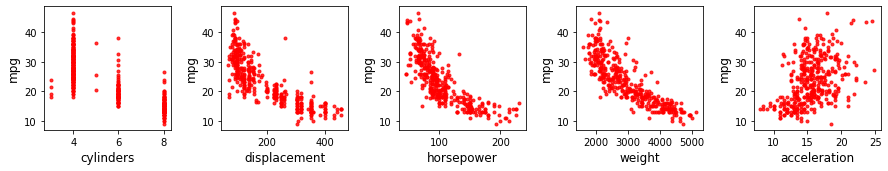

In [4]:
# Draw scatter plots to check outliers
horz = 5                     # horizontal number of graph
vert = 5                     # vertical number of graph
graph_num = horz * vert      # maximum number of graphs
axes = list()

fig = plt.figure(figsize=(15, 15))

for i in range(1, len(X.columns)):
    axes.append(fig.add_subplot(vert, horz, i))
    for j in range(len(X)) :
        x = X.iloc[j, i]
        y = X.iloc[j, 0]
        axes[i-1].scatter(x, y, marker='.', c = 'r', alpha = 0.8)
    axes[i-1].set_xlabel(X.columns[i], size = 12)
    axes[i-1].set_ylabel(X.columns[0], size = 12)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

## Gaussian mixture model

### Bayesian information criterion (BIC)

In [5]:
max_number_of_components = 10
covariance_types = ['full', 'diag', 'tied', 'spherical']

In [6]:
bic_values = np.empty([max_number_of_components, len(covariance_types)])
bic_values.shape

(10, 4)

In [7]:
from sklearn.mixture import GaussianMixture

# Grid search using BIC
for covariance_type_index, covariance_type in enumerate(covariance_types):
    for number_of_components in range(max_number_of_components):
        gmm_model = GaussianMixture(n_components = number_of_components + 1, covariance_type = covariance_type)
        gmm_model.fit(X)
        bic_values[number_of_components, covariance_type_index] = gmm_model.bic(X)

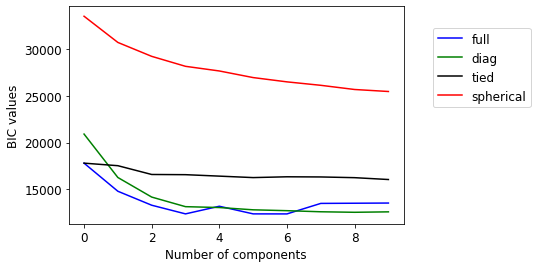

In [8]:
# Plot
plt.rcParams["font.size"] = 12
plt.figure()

plt.plot(bic_values[:, 0], 'b-', label='full')
plt.plot(bic_values[:, 1], 'g-', label='diag')
plt.plot(bic_values[:, 2], 'k-', label='tied')
plt.plot(bic_values[:, 3], 'r-', label='spherical')

plt.xlabel('Number of components')
plt.ylabel('BIC values')
plt.legend(bbox_to_anchor=(0.88, 0.9, 0.5, 0.001), borderaxespad=0., )
plt.show()

In [9]:
# Optimal parameters
optimal_index = np.where(bic_values == bic_values.min())
optimal_number_of_components = optimal_index[0][0] + 1
optimal_covariance_type = covariance_types[optimal_index[1][0]]

print(optimal_index)
print(optimal_number_of_components)
print(optimal_covariance_type)

(array([6], dtype=int64), array([0], dtype=int64))
7
full


In [10]:
# GMM
gmm = GaussianMixture(n_components = optimal_number_of_components, covariance_type = optimal_covariance_type)
gmm.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=7, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [11]:
# mean and covariance
means = gmm.means_
if gmm.covariance_type == 'full':
    all_covariances = gmm.covariances_
elif gmm.covariance_type == 'diag':
    all_covariances = np.empty(
        [gmm.n_components, gmm.covariances_.shape[1], gmm.covariances_.shape[1]])
    for component_number in range(gmm.n_components):
        all_covariances[component_number, :, :] = np.diag(gmm.covariances_[component_number, :])
elif gmm.covariance_type == 'tied':
    all_covariances = np.tile(gmm.covariances_, (gmm.n_components, 1, 1))
elif gmm.covariance_type == 'spherical':
    all_covariances = np.empty([gmm.n_components, gmm.means_.shape[1], gmm.means_.shape[1]])
    for component_number in range(gmm.n_components):
        all_covariances[component_number, :, :] = np.diag(
            gmm.covariances_[component_number] * np.ones(gmm.means_.shape[1]))

In [12]:
labels = gmm.predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 6, 5, 5, 2, 2, 2, 2, 2,
       6, 5, 4, 4, 4, 4, 2, 6, 6, 5, 5, 5, 5, 5, 1, 1, 1, 1, 4, 4, 4, 5,
       6, 5, 5, 6, 6, 2, 2, 2, 2, 2, 2, 6, 2, 2, 6, 6, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 2, 6, 2, 2, 6, 2, 6, 2, 2, 1, 1, 1, 1, 1,
       1, 4, 1, 1, 1, 1, 1, 5, 5, 5, 5, 2, 4, 4, 1, 4, 5, 2, 6, 2, 0, 0,
       2, 1, 1, 2, 6, 2, 2, 1, 2, 0, 1, 5, 5, 5, 2, 2, 6, 5, 5, 5, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 6, 2, 2, 5, 5, 5, 1, 1, 1, 1, 5,
       5, 5, 5, 5, 1, 1, 2, 5, 6, 6, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 6, 6,
       2, 2, 1, 1, 1, 1, 5, 5, 5, 2, 2, 2, 2, 5, 5, 5, 5, 2, 2, 2, 2, 1,
       2, 0, 5, 1, 1, 1, 1, 2, 2, 2, 6, 2, 1, 1, 1, 1, 5, 5, 5, 5, 1, 1,
       1, 1, 2, 6, 2, 6, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 1, 1, 1, 5,
       5, 5, 6, 5, 5, 5, 5, 5, 5, 1, 5, 1, 1, 2, 6, 6, 2, 6, 6, 6, 6, 0,
       0, 2, 0, 2, 2, 5, 5, 6, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       3, 5, 2, 5, 2, 2, 2, 2, 6, 0, 0, 6, 2, 2, 2,

### Obtain cluster labels

In [13]:
df['CLS_label'] = labels
print(df.shape)
df.head()

(383, 8)


,car name,mpg,cylinders,displacement,horsepower,weight,acceleration,CLS_label
0,chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,1
1,buick skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,1
2,plymouth satellite,18.0,8.0,318.0,150.0,3436.0,11.0,1
3,amc rebel sst,16.0,8.0,304.0,150.0,3433.0,12.0,1
4,ford torino,17.0,8.0,302.0,140.0,3449.0,10.5,1


In [14]:
# Check number of labels
num_uniq = np.unique(df['CLS_label'])
print(num_uniq)

[0 1 2 3 4 5 6]


In [15]:
# Save the file with cluster labels
df.to_csv('GMM_clustering_w_label.csv', index = False)

### Visualization

In [16]:
column_names = df.columns.values         # list of column names
print(df.shape)

(383, 8)


In [17]:
# make list of colors to draw scatter plot in different colors by cluster 
color_codes = {0:'red',
               1:'green',
               2:'blue',
               3:'yellow',
               4:'magenta',
               5:'cyan',
               6:'black',
               7:'brown',
               8:'orange',
               9:'pink'}

colors = list()
for i in range(len(labels)) :
    colors.append(color_codes[labels[i]])

In [18]:
# save files and print data size by label
for i in range(int(6)) :
  label_num = i
  df_new = df[df['CLS_label'] == label_num]
  print('data size of CLS label ', label_num, color_codes.get(i), ' = ', len(df_new), sep = '\t')
  df_new.to_csv('GMM_cluster_' + str(label_num) + '.csv')

data size of CLS label 	0	red	 = 	17
data size of CLS label 	1	green	 = 	88
data size of CLS label 	2	blue	 = 	143
data size of CLS label 	3	yellow	 = 	6
data size of CLS label 	4	magenta	 = 	11
data size of CLS label 	5	cyan	 = 	66


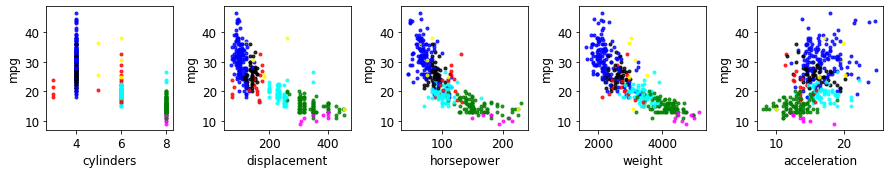

In [19]:
# Draw scatter plots by clusters
horz = 5                     # horizontal number of graph
vert = 5                     # vertical number of graph
graph_num = horz * vert      # maximum number of graphs

axes = list()
fig = plt.figure(figsize=(15, 15))

for i in range(1, len(X.columns)):
    axes.append(fig.add_subplot(vert, horz, i))
    for j in range(len(X)) :
        x = X.iloc[j, i]
        y = X.iloc[j, 0]
        axes[i-1].scatter(x, y, marker='.', c = colors[j], alpha = 0.8)
    axes[i-1].set_xlabel(X.columns[i], size = 12)
    axes[i-1].set_ylabel(X.columns[0], size = 12)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()